# EDA and Sentimental Analysis of Mr.Donald Trump's Tweets from 2014 to 2021

# Author :- Saurabh Arvind Parab

# Importing Libraries

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing,
import plotly.graph_objs as go
from textblob import TextBlob 
from statistics import *
import plotly.express as px
import string
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
from nltk.corpus import stopwords

# Reading the Data into Dataframe

In [72]:
df=pd.read_csv(r'C:\Users\Saurabh\Data\trump_insult_tweets_2014_to_2021.csv',index_col=0)

In [73]:
df.head(50)

date                    target  \
1   2014-10-09            thomas-frieden   
2   2014-10-09            thomas-frieden   
3   2015-06-16               politicians   
4   2015-06-24                ben-cardin   
5   2015-06-24                neil-young   
6   2015-06-24  rockin-in-the-free-world   
7   2015-06-25              willie-geist   
8   2015-06-25                  jeb-bush   
9   2015-06-25                molly-sims   
10  2015-06-25            nicole-wallace   
11  2015-06-25                  the-view   
12  2015-06-25                  the-view   
13  2015-06-25            nicole-wallace   
14  2015-06-25                  the-view   
15  2015-06-25        lawrence-o-donnell   
16  2015-06-25        lawrence-o-donnell   
17  2015-06-25                rick-scott   
18  2015-06-26              john-roberts   
19  2015-06-26                 univision   
20  2015-06-26              john-roberts   
21  2015-06-28       new-york-daily-news   
22  2015-06-28            mort-zuckerman   
23  2015-06-28       new-york-daily-news   
24  2015-06-29              saudi-arabia   
25  2015-06-30                    mexico   
26  2015-06-30                    mexico   
27  2015-07-01                     macys   
28  2015-07-01             george-pataki   
29  2015-07-01             george-pataki   
30  2015-07-01                     macys   
31  2015-07-01                     macys   
32  2015-07-02                     macys   
33  2015-07-02                     macys   
34  2015-07-02                     macys   
35  2015-07-02              barack-obama   
36  2015-07-03           southern-border   
37  2015-07-03           southern-border   
38  2015-07-03             juan-williams   
39  2015-07-05              paulina-vega   
40  2015-07-05                rick-perry   
41  2015-07-05                rick-perry   
42  2015-07-05                  jeb-bush   
43  2015-07-07             united-states   
44  2015-07-07                     macys   
45  2015-07-09       charles-krauthammer   
46  2015-07-09       charles-krauthammer   
47  2015-07-09             george-w-bush   
48  2015-07-09             george-w-bush   
49  2015-07-09            clare-o-connor   
50  2015-07-09                    forbes   

                                               insult  \
1                                                fool   
2                                                DOPE   
3                              all talk and no action   
4   It's politicians like Cardin that have destroy...   
5                                     total hypocrite   
6                                      didn't love it   
7                               uncomfortable looking   
8                 will NEVER Make America Great Again   
9                                          a disaster   
10                                         a disaster   
11                                          dead T.V.   
12                                    put it to sleep   
13                                doesn't have a clue   
14                                     close to death   
15                             dopey political pundit   
16             one of the dumber people on television   
17                    did really poorly on television   
18                                        let us down   
19                  controlled by Mexican government?   
20  my judicial appointments will do the right thi...   
21                                      dying tabloid   
22                                        dopey clown   
23                                         it is dead   
24                                  without us, gone!   
25                                     not our friend   
26                                 they're killing us   
27                            weak on border security   
28          terrible governor of NY, one of the worst   
29    couldn't be elected dog catcher if he ran again   
30                                            racists  

In [6]:
df.shape

(10360, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10360 entries, 0 to 10359
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10360 non-null  int64 
 1   date        10360 non-null  object
 2   target      10358 non-null  object
 3   insult      10360 non-null  object
 4   tweet       10360 non-null  object
dtypes: int64(1), object(4)
memory usage: 404.8+ KB


# Dropping missing values

In [8]:
df=df.dropna()

In [9]:
df.shape

(10358, 5)

In [10]:
#df.set_index('date',inplace=True)


In [11]:
df['date']=pd.to_datetime(df.date,format='%Y-%m-%d')


# EDA

In [12]:
#number of trump tweets per year
df['date'].value_counts().resample('Y').sum()

2014-12-31       2
2015-12-31     757
2016-12-31    1539
2017-12-31    1119
2018-12-31    1777
2019-12-31    2425
2020-12-31    2712
2021-12-31      27
Freq: A-DEC, Name: date, dtype: int64

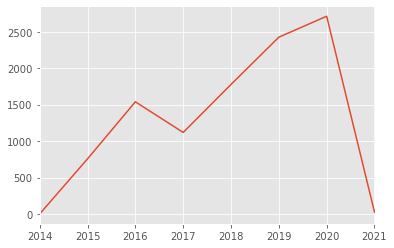

In [13]:
df['date'].value_counts().resample('Y').sum().plot.line()


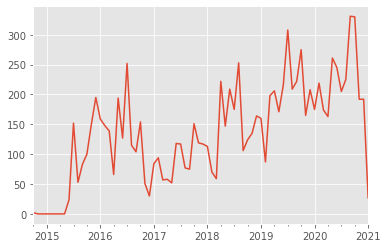

In [14]:
#number of trump tweets per month
df['date'].value_counts().resample('m').sum().plot.line()

In [15]:
df['target'].unique()


array(['thomas-frieden', 'politicians', 'ben-cardin', 'neil-young',
       'rockin-in-the-free-world', 'willie-geist', 'jeb-bush',
       'molly-sims', 'nicole-wallace', 'the-view', 'lawrence-o-donnell',
       'rick-scott', 'john-roberts', 'univision', 'new-york-daily-news',
       'mort-zuckerman', 'saudi-arabia', 'mexico', 'macys',
       'george-pataki', 'barack-obama', 'southern-border',
       'juan-williams', 'paulina-vega', 'rick-perry', 'united-states',
       'charles-krauthammer', 'george-w-bush', 'clare-o-connor', 'forbes',
       'republicans', 'iran', 'jeb-bush-supporters', 'chuck-todd',
       'meet-the-press', 'karl-rove', 'penn-jillette',
       'the-last-word-with-lawrence-o-donnell', 'iran-deal',
       'john-mccain', 'arianna-huffington', 'huffington-post', 'cnn',
       'mitt-romney', 'wall-street-journal', 'des-moines-register', '???',
       'frank-luntz', 'anderson-cooper-360', 'anderson-cooper',
       'tim-o-brien', 'weekly-standard', 'dana-perino', 'scott-wal

In [16]:
a=df['target'].value_counts().sort_values(ascending=False)
a.head(10)

the-media              1287
democrats               647
hillary-clinton         625
trump-russia            441
joe-biden               402
the-new-york-times      392
cnn                     295
impeachment-inquiry     247
adam-schiff             143
2020-election           143
Name: target, dtype: int64

# Let's analysis top 10 targets that Mr.Trump's interested in

# First we will talk about media tweets

In [17]:
media=df[df['target']=='the-media']

In [18]:
a=media['insult'].value_counts()
#top ten insults in media tweets
b=a[:10]
px.bar(media, x=b.values,y= b.index, color=b.index, height=500)

In [19]:
#find and count mentions


def mentions(text):
    line=re.findall(r'(?<=@)\w+',text)
    return " ".join(line)
media['mentions']=media['tweet'].apply(lambda x:mentions(x))

temp=media['mentions'].value_counts()[:][1:10]
 
px.bar(media, x=temp.values,y= temp.index, color=temp.index, height=500)

<ipython-input-19-5856f3925f04>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
#treemap of mentions
b = media['mentions'].value_counts()[:][1:11].index.tolist()
a = media['mentions'].value_counts()[:][1:11].tolist()
row = pd.DataFrame({'scenario' : []})
row["scenario"] = b
row["Percentage"] = a
fig = px.treemap(row, path= ["scenario"], values="Percentage",title='Tree of Mentions')
fig.show()

Text(0.5, 1.0, 'the-media tweets')

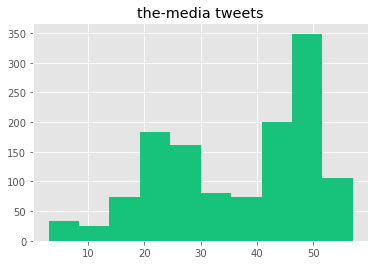

In [21]:
#4. Number of words in a tweet

fig = plt.figure()
ax1 = plt.axes()

#fig,ax1=plot(figsize=(15,5))
#fig,ax1=plt.figure()
tweet_len=df[df['target']=="the-media"]['tweet'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='#17C37B')
ax1.set_title('the-media tweets')

In [22]:
#count and find hashtags


def find_hash(text):
    line=re.findall(r'(?<=#)\w+',text)
    return " ".join(line)
media['hash']=media['tweet'].apply(lambda x:find_hash(x))

#find top ten hashtags in media tweets

temp=media['hash'].value_counts()[:][1:11]
px.bar(media, x=temp.values,y= temp.index, color=temp.index, height=500)

<ipython-input-22-5c8e1bf45d98>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Clean media tweets



In [23]:
def clean_tweets(tweet):
 
    tweet = re.sub(r':', '', str(tweet))
    tweet = re.sub(r'‚Ä¶', '', str(tweet))
    tweet = re.sub('@[A-Za-z0–9]+', '', str(tweet))               
    tweet = re.sub('#', '', str(tweet)) # Removing '#' hash tag
    tweet = re.sub('https?:\/\/\S+', '', str(tweet)) # Removing hyperlink
    #replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ',str(tweet))
    tweet = str(tweet).lower()
    tweet = re.sub('\[.*?\]', '', tweet)
    tweet = re.sub('https?://\S+|www\.\S+', '', tweet)
    tweet = re.sub('<.*?>+', '', tweet)
    tweet = re.sub('\n', '', tweet)
    tweet = re.sub('\w*\d\w*', '', tweet)
    tweet = re.sub(r'#','',tweet)
    tweet = re.sub(r'RT[\s]+','',tweet)
    tweet = re.sub(r'[^\w]', ' ', tweet)
    tweet = re.sub('https', '', tweet)
    tweet = re.sub('https ', '', tweet)
    tweet = re.sub('co', '', tweet)
    words = [w for w in tweet if w not in stopwords.words('english')]

    return tweet

# Applying the cleaning function to both test and training datasets
media['tweet'] = media['tweet'].apply(lambda x: clean_tweets(x))

<ipython-input-23-206323d04e94>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# WordCloud

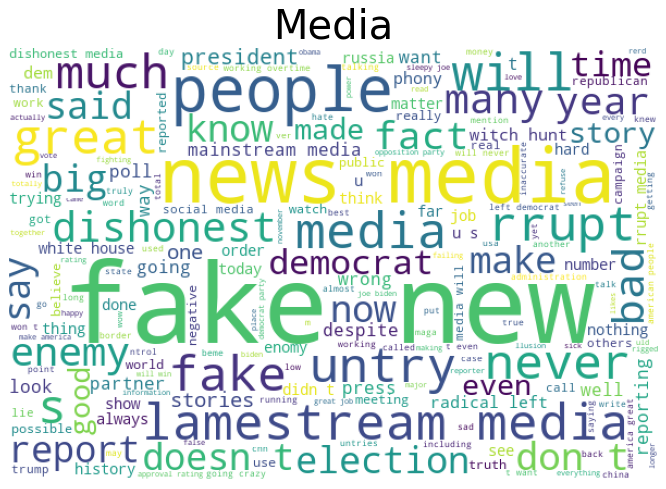

In [24]:
from wordcloud import WordCloud
fig, ax1 = plt.subplots(1, 1, figsize=[26, 8])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(media['tweet']))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Media',fontsize=40);

# Doing sentimental analysis for media tweets


In [25]:
## Sentimental Analysis 

def getSubjectivity(tweet):
    try:
        return TextBlob(tweet).sentiment.subjectivity
    except:
        return None


In [26]:
# Create a function to get the polarity
def getPolarity(tweet):
    try:
        return  TextBlob(tweet).sentiment.polarity
    except:
        return None

def sentiment_calc(tweet):
    try:
        return TextBlob(tweet).sentiment
    except:
        return None

In [27]:
# Create two new columns 'Subjectivity' & 'Polarity'
media['subjectivity'] = media['tweet'].apply(getSubjectivity)
media['polarity'] = media['tweet'].apply(getPolarity)

#calculating sentimental

media['sentiment'] = media['tweet'].apply(sentiment_calc)

<ipython-input-27-650c945180d1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-650c945180d1>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-650c945180d1>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'

media['analysis'] = media['polarity'].apply(getAnalysis)

<ipython-input-28-16f99f16b083>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Sentiment Analyisis for media tweets ')

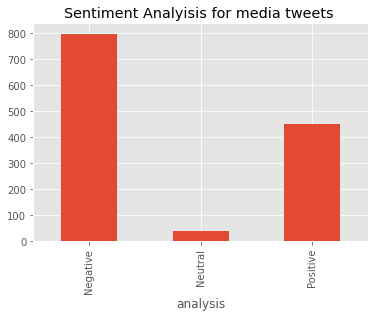

In [29]:
media.groupby('analysis')['analysis'].count().plot.bar()
plt.title('Sentiment Analyisis for media tweets ')

In [30]:
x=media.groupby('analysis')['analysis'].count()
neutral=media[media['analysis']=='Neutral']['tweet'].count()
positive=media[media['analysis']=='Positive']['tweet'].count()
negative=media[media['analysis']=='Negative']['tweet'].count()

fig = go.Figure(data=[go.Pie(labels=["positivity","negativity","neutrality"], values=[positive,negative,neutral])])
fig.update_layout(title_text='Sentiment analysis of media tweets')
fig.show()

# Lets start with the Democrats tweets

In [31]:
demo=df[df['target']=='democrats']

In [32]:
a=demo['insult'].value_counts()
#top ten insults in media tweets
b=a[:10]
px.bar(demo, x=b.values,y= b.index, color=b.index, height=500)

Text(0.5, 1.0, 'Democrats Tweets')

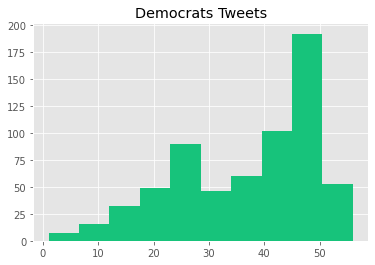

In [33]:
#4. Number of words in a tweet

fig = plt.figure()
ax1 = plt.axes()

#fig,ax1=plot(figsize=(15,5))
#fig,ax1=plt.figure()
tweet_len=df[df['target']=="democrats"]['tweet'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='#17C37B')
ax1.set_title('Democrats Tweets')

In [34]:
def clean_tweets(tweet):
 
    tweet = re.sub(r':', '', str(tweet))
    tweet = re.sub(r'‚Ä¶', '', str(tweet))
    tweet = re.sub('@[A-Za-z0–9]+', '', str(tweet))               
    tweet = re.sub('#', '', str(tweet)) # Removing '#' hash tag
    tweet = re.sub('https?:\/\/\S+', '', str(tweet)) # Removing hyperlink
    #replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ',str(tweet))
    tweet = str(tweet).lower()
    tweet = re.sub('\[.*?\]', '', tweet)
    tweet = re.sub('https?://\S+|www\.\S+', '', tweet)
    tweet = re.sub('<.*?>+', '', tweet)
    tweet = re.sub('\n', '', tweet)
    tweet = re.sub('\w*\d\w*', '', tweet)
    tweet = re.sub(r'#','',tweet)
    tweet = re.sub(r'RT[\s]+','',tweet)
    tweet = re.sub(r'[^\w]', ' ', tweet)
    tweet = re.sub('https', '', tweet)
    tweet = re.sub('https ', '', tweet)
    tweet = re.sub('co', '', tweet)
    words = [w for w in tweet if w not in stopwords.words('english')]

    return tweet

# Applying the cleaning function to both test and training datasets
demo['tweet'] = demo['tweet'].apply(lambda x: clean_tweets(x))

<ipython-input-34-eb6cc8df9450>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



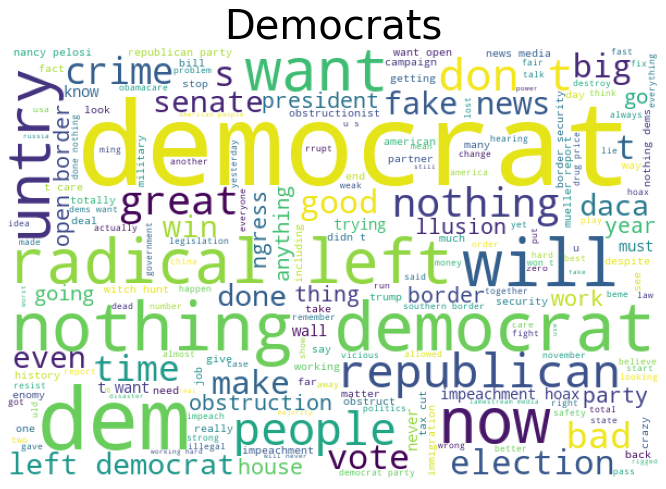

In [35]:
from wordcloud import WordCloud
fig, ax1 = plt.subplots(1, 1, figsize=[26, 8])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(demo['tweet']))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Democrats',fontsize=40);

# Doing sentimental analysis for Democrats tweets


In [36]:
## Sentimental Analysis 

def getSubjectivity(tweet):
    try:
        return TextBlob(tweet).sentiment.subjectivity
    except:
        return None

In [37]:
# Create a function to get the polarity
def getPolarity(tweet):
    try:
        return  TextBlob(tweet).sentiment.polarity
    except:
        return None

def sentiment_calc(tweet):
    try:
        return TextBlob(tweet).sentiment
    except:
        return None

In [38]:
# Create two new columns 'Subjectivity' & 'Polarity'
demo['subjectivity'] = demo['tweet'].apply(getSubjectivity)
demo['polarity'] = demo['tweet'].apply(getPolarity)

#calculating sentimental

demo['sentiment'] = demo['tweet'].apply(sentiment_calc)

<ipython-input-38-6a96072ca7aa>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-38-6a96072ca7aa>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-38-6a96072ca7aa>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'

demo['analysis'] = demo['polarity'].apply(getAnalysis)

<ipython-input-39-6bfe54d45de7>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Sentiment Analyisis for Democrats tweets ')

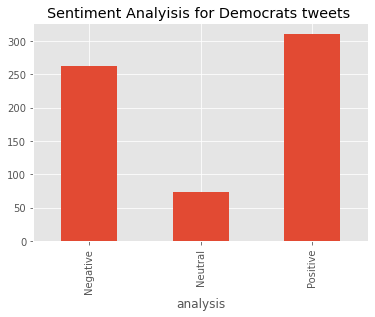

In [40]:
demo.groupby('analysis')['analysis'].count().plot.bar()
plt.title('Sentiment Analyisis for Democrats tweets ')

In [41]:
x=demo.groupby('analysis')['analysis'].count()
neutral=demo[demo['analysis']=='Neutral']['tweet'].count()
positive=demo[demo['analysis']=='Positive']['tweet'].count()
negative=demo[demo['analysis']=='Negative']['tweet'].count()

fig = go.Figure(data=[go.Pie(labels=["positivity","negativity","neutrality"], values=[positive,negative,neutral])])
fig.update_layout(title_text='Sentiment analysis of media tweets')
fig.show()

# Lets start with the Hillary-clinton tweets

In [42]:
hil=df[df['target']=='hillary-clinton']

In [43]:
a=hil['insult'].value_counts()
#top ten insults in media tweets
b=a[:10]
px.bar(hil, x=b.values,y= b.index, color=b.index, height=500)

Text(0.5, 1.0, 'Hillary Clinton Tweets')

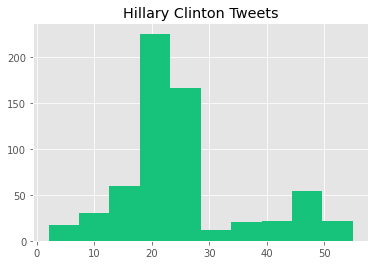

In [44]:
#4. Number of words in a tweet

fig = plt.figure()
ax1 = plt.axes()

#fig,ax1=plot(figsize=(15,5))
#fig,ax1=plt.figure()
tweet_len=df[df['target']=="hillary-clinton"]['tweet'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='#17C37B')
ax1.set_title('Hillary Clinton Tweets')

In [45]:
def clean_tweets(tweet):
 
    tweet = re.sub(r':', '', str(tweet))
    tweet = re.sub(r'‚Ä¶', '', str(tweet))
    tweet = re.sub('@[A-Za-z0–9]+', '', str(tweet))               
    tweet = re.sub('#', '', str(tweet)) # Removing '#' hash tag
    tweet = re.sub('https?:\/\/\S+', '', str(tweet)) # Removing hyperlink
    #replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ',str(tweet))
    tweet = str(tweet).lower()
    tweet = re.sub('\[.*?\]', '', tweet)
    tweet = re.sub('https?://\S+|www\.\S+', '', tweet)
    tweet = re.sub('<.*?>+', '', tweet)
    tweet = re.sub('\n', '', tweet)
    tweet = re.sub('\w*\d\w*', '', tweet)
    tweet = re.sub(r'#','',tweet)
    tweet = re.sub(r'RT[\s]+','',tweet)
    tweet = re.sub(r'[^\w]', ' ', tweet)
    tweet = re.sub('https', '', tweet)
    tweet = re.sub('https ', '', tweet)
    tweet = re.sub('co', '', tweet)
    words = [w for w in tweet if w not in stopwords.words('english')]

    return tweet

# Applying the cleaning function to both test and training datasets
hil['tweet'] = hil['tweet'].apply(lambda x: clean_tweets(x))

<ipython-input-45-34f03168170e>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



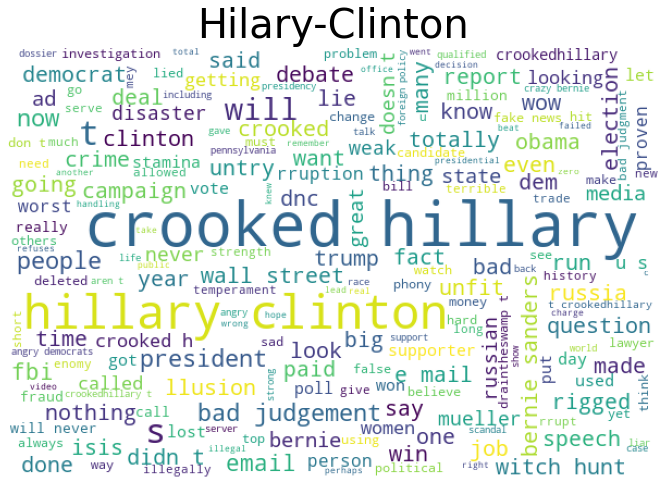

In [55]:
from wordcloud import WordCloud
fig, ax1 = plt.subplots(1, 1, figsize=[26, 8])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(hil['tweet']))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Hilary-Clinton',fontsize=40);

# Doing sentimental analysis for Hilary-Clinton tweets

In [47]:
## Sentimental Analysis 

def getSubjectivity(tweet):
    try:
        return TextBlob(tweet).sentiment.subjectivity
    except:
        return None

In [48]:
# Create a function to get the polarity
def getPolarity(tweet):
    try:
        return  TextBlob(tweet).sentiment.polarity
    except:
        return None

def sentiment_calc(tweet):
    try:
        return TextBlob(tweet).sentiment
    except:
        return None

In [49]:
# Create two new columns 'Subjectivity' & 'Polarity'
hil['subjectivity'] = hil['tweet'].apply(getSubjectivity)
hil['polarity'] = hil['tweet'].apply(getPolarity)

#calculating sentimental

hil['sentiment'] = hil['tweet'].apply(sentiment_calc)

<ipython-input-49-a17679e8a4fc>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-49-a17679e8a4fc>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-49-a17679e8a4fc>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'

hil['analysis'] = hil['polarity'].apply(getAnalysis)

<ipython-input-50-529b7d4d1068>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Sentiment Analyisis for Hilary-Clinton tweets ')

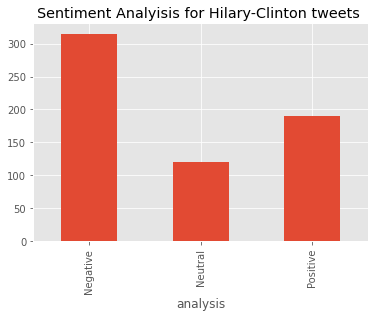

In [51]:
hil.groupby('analysis')['analysis'].count().plot.bar()
plt.title('Sentiment Analyisis for Hilary-Clinton tweets ')

In [52]:
x=hil.groupby('analysis')['analysis'].count()
neutral=hil[hil['analysis']=='Neutral']['tweet'].count()
positive=hil[hil['analysis']=='Positive']['tweet'].count()
negative=hil[hil['analysis']=='Negative']['tweet'].count()

fig = go.Figure(data=[go.Pie(labels=["positivity","negativity","neutrality"], values=[positive,negative,neutral])])
fig.update_layout(title_text='Sentiment analysis of Hilary-Clinton tweets')
fig.show()

# Lets start with the Joe Biden tweets

In [54]:
joe=df[df['target']=='joe-biden']

In [56]:
a=joe['insult'].value_counts()
#top ten insults in media tweets
b=a[:10]
px.bar(hil, x=b.values,y= b.index, color=b.index, height=500)

Text(0.5, 1.0, 'Joe-Biden Tweets')

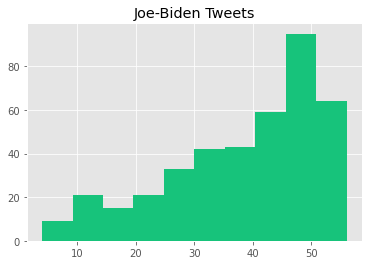

In [59]:
#4. Number of words in a tweet

fig = plt.figure()
ax1 = plt.axes()

#fig,ax1=plot(figsize=(15,5))
#fig,ax1=plt.figure()
tweet_len=df[df['target']=="joe-biden"]['tweet'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='#17C37B')
ax1.set_title('Joe-Biden Tweets')

In [60]:
def clean_tweets(tweet):
 
    tweet = re.sub(r':', '', str(tweet))
    tweet = re.sub(r'‚Ä¶', '', str(tweet))
    tweet = re.sub('@[A-Za-z0–9]+', '', str(tweet))               
    tweet = re.sub('#', '', str(tweet)) # Removing '#' hash tag
    tweet = re.sub('https?:\/\/\S+', '', str(tweet)) # Removing hyperlink
    #replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ',str(tweet))
    tweet = str(tweet).lower()
    tweet = re.sub('\[.*?\]', '', tweet)
    tweet = re.sub('https?://\S+|www\.\S+', '', tweet)
    tweet = re.sub('<.*?>+', '', tweet)
    tweet = re.sub('\n', '', tweet)
    tweet = re.sub('\w*\d\w*', '', tweet)
    tweet = re.sub(r'#','',tweet)
    tweet = re.sub(r'RT[\s]+','',tweet)
    tweet = re.sub(r'[^\w]', ' ', tweet)
    tweet = re.sub('https', '', tweet)
    tweet = re.sub('https ', '', tweet)
    tweet = re.sub('co', '', tweet)
    words = [w for w in tweet if w not in stopwords.words('english')]

    return tweet

# Applying the cleaning function to both test and training datasets
joe['tweet'] = joe['tweet'].apply(lambda x: clean_tweets(x))

<ipython-input-60-dbe5935a6d93>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



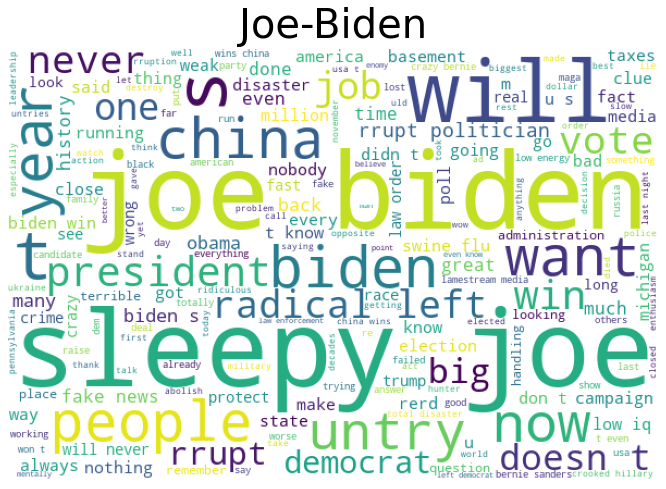

In [61]:
from wordcloud import WordCloud
fig, ax1 = plt.subplots(1, 1, figsize=[26, 8])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(joe['tweet']))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Joe-Biden',fontsize=40);